In [11]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from scipy.optimize import curve_fit 

def data_blocking(data,l):
    N = data.size
    blocked_data = np.array([])
    for i in range(0,N,l):
        a = np.mean(data[i:i+l])
        blocked_data = np.append(blocked_data,a)
    
    return blocked_data

def bootstrap_data(data):
    N = data.size
    new_data = np.zeros(N)
    for i in range(N):
        new_data[i] = data[np.random.randint(0,N-1)] 
    return new_data

def autocorr(data,lag):
    mean = np.mean(data)
    C_0 = np.mean((data-mean)**2)
    if(C_0 == 0):
        return 0
    if(lag>0):
        C_X = np.mean((data[lag:]-mean)*(data[:-lag]-mean))
    else:
        C_X = np.mean((data-mean)**2)
    return C_X/C_0

def autocorr_array(data,lag):
    x= np.zeros(lag)
    for i in range(lag):
        x[i] = autocorr(data,i)
    return x

def data_blocking_error(data,length):
    result = np.zeros((3,length))
    for i in range(1,length):
        N =len(data)
        x = []
        for j in range(0,N,i):
            a = data[j:j+i]
            x.append(np.std(a))
        result[0,i] = i
        result[1,i] = np.mean(x)
        result[2,i] = np.std(x)/np.sqrt(len(x))
   
    return result

def binder_cummulanten(Spin):
    m_4 = np.mean(Spin**4)
    m_2 = np.mean(Spin**2)
    M_2 = m_2**2
    m_3 = np.mean(Spin**3)
    binder_cumm = 1-m_4/(3*M_2)
    #error = np.abs((4*m_2*m_3)-(4*m_4*m_2*np.mean(Spin)))/(3*M_2**2)*np.std(Spin)
    return binder_cumm



def specific_heat(data):
    return np.std(data)**2

def binder_cum_plot(spin_simulation,color='r',format='.',boot_length=None,label=None):
    temp_dim = spin_simulation.shape[1]
    new_array = np.array([])
    for i in range(temp_dim):
        x_achse = 1/spin_simulation[0,i]
        new_data = spin_simulation[1:,i]
        block_len = block_length(new_data)
        new_data = data_blocking(new_data,block_len)
        new_data2 = np.array([])
        for _ in range(block_len):
            new_data2 = np.append(new_data2,bootstrap_data(new_data))
        y_data = binder_cummulanten(new_data2)
        binder_error = np.array([])
        for _ in range(boot_length):
            binder_error = np.append(binder_error,binder_cummulanten(bootstrap_data(new_data)))

        new_array = np.append(new_array,y_data)
        y_err = np.std(binder_error)
        if(i<(temp_dim-1)):
            plt.errorbar(x_achse,y_data,yerr=y_err,c=color,fmt=format)
        
        else:
            plt.errorbar(x_achse,y_data,yerr=y_err,c=color,fmt=format,label=label)
        
    return new_array

def spin_simulation_plot(spin_simulation,color='r',format='.',boot_length=1,label=None):
    temp_dim = spin_simulation.shape[1] 
    for i in range(temp_dim):
        x_achse = 1/spin_simulation[0,i]
        new_data = spin_simulation[1:,i]
        block_len = block_length(new_data)
        new_data = data_blocking(new_data,block_len)
        new_data2 = np.array([]) 
        for _ in range(block_len): 
            new_data2 = np.append(new_data2,bootstrap_data(new_data))
        if(i<(temp_dim-1)):
            plt.errorbar(x_achse,np.mean(new_data2),yerr=np.std(new_data2),c=color,fmt=format)
        
        else:
            plt.errorbar(x_achse,np.mean(new_data2),yerr=np.std(new_data2),c=color,fmt=format,label=label)
        

    return

def block_length(data):

    auto = autocorr_array(data,lag=1000)
    a = np.where(auto <0.1)[0]
    if(a[0] != 0):
        return a[0]
    return 1


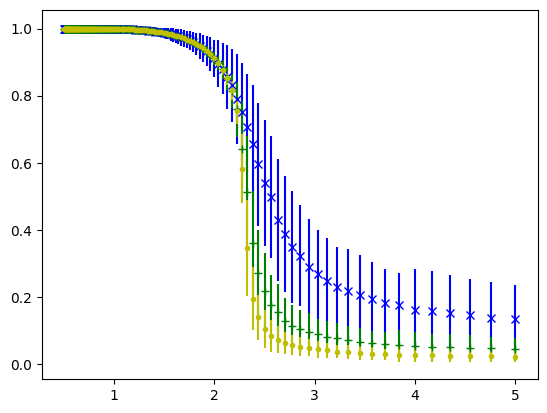

In [12]:
spin_simulation_1 = np.loadtxt("../data/Spin_L10.txt").T
spin_simulation_2 = np.loadtxt("../data/Spin_L20.txt").T
spin_simulation_3 = np.loadtxt("../data/Spin_L30.txt").T
spin_simulation_4 = np.loadtxt("../data/Spin_L40.txt").T
spin_simulation_5 = np.loadtxt("../data/Spin_L50.txt").T
spin_simulation_6 = np.loadtxt("../data/Spin_L60.txt").T


spin_simulation_plot(spin_simulation_1,color='b',format='x',label="L = 10") 
spin_simulation_plot(spin_simulation_3,color='g',format='+',label="L = 30")
spin_simulation_plot(spin_simulation_6,color='y',format='.',label="L = 60")
plt.legend()
plt.show()


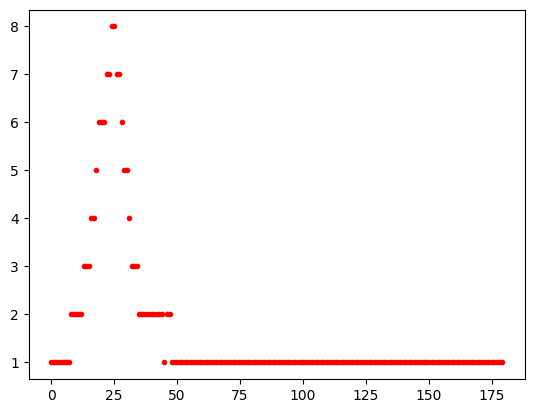

In [3]:
arr = []
for i in range(spin_simulation_1.shape[1]):
    auto = autocorr_array(spin_simulation_1[1:,i],lag=1000)
    a = np.where(auto <0.2)[0]
    if(a[0] != 0):
        arr.append(a[0])
    else:
        arr.append(1)
plt.plot(arr,'.',c= 'red')
plt.show()


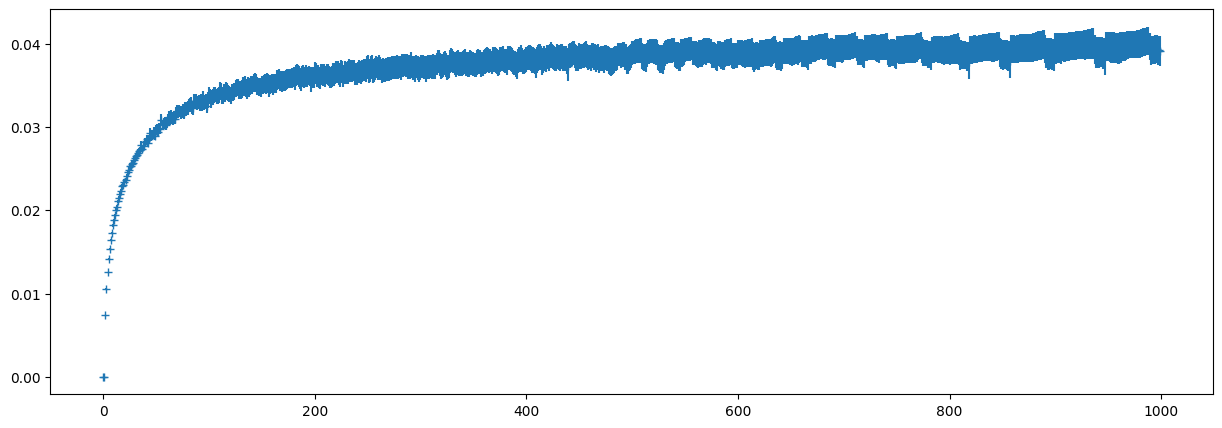

In [4]:
# Finde Blocklaenge
fig,ax = plt.subplots(figsize=(15,5))
length = 1000
spin = spin_simulation_6[1:,26]
x_1,y_1,y_err = data_blocking_error(spin,length)
ax.errorbar(x_1,y_1,yerr=y_err,fmt= '+',barsabove=True)
plt.show()
     

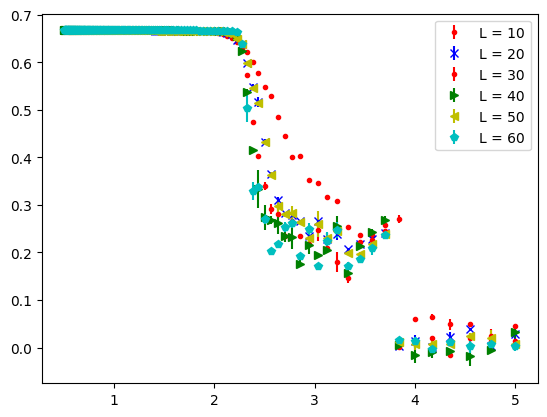

In [5]:
length = 2
L_1 = binder_cum_plot(spin_simulation_1,boot_length=length,color='r',format='.',label="L = 10")
L_2 = binder_cum_plot(spin_simulation_2,boot_length=length,color='b',format='x',label="L = 20")
L_3 = binder_cum_plot(spin_simulation_3,boot_length=length,color='r',format='.',label="L = 30")
L_4 = binder_cum_plot(spin_simulation_4,boot_length=length,color='g',format='>',label="L = 40")
L_5 = binder_cum_plot(spin_simulation_2,boot_length=length,color='y',format='<',label="L = 50")
L_6 = binder_cum_plot(spin_simulation_6,boot_length=length,color='c',format='p',label="L = 60")

plt.legend()
plt.show()

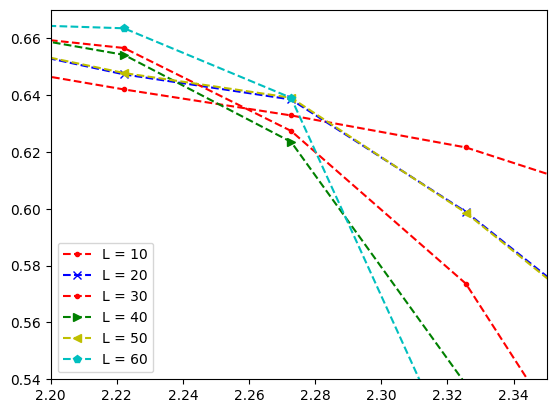

In [6]:
L = spin_simulation_1[0,:]
plt.plot(1/L,L_1,'.--',color='r',label="L = 10")
plt.plot(1/L,L_2,'x--',color='b',label="L = 20")
plt.plot(1/L,L_3,'.--',color='r',label="L = 30")
plt.plot(1/L,L_4,'>--',color='g',label="L = 40")
plt.plot(1/L,L_5,'<--',color='y',label="L = 50")
plt.plot(1/L,L_6,'p--',color='c',label="L = 60")
plt.xlim(2.2,2.35)
plt.ylim(0.54,0.67)
plt.legend()
plt.show()

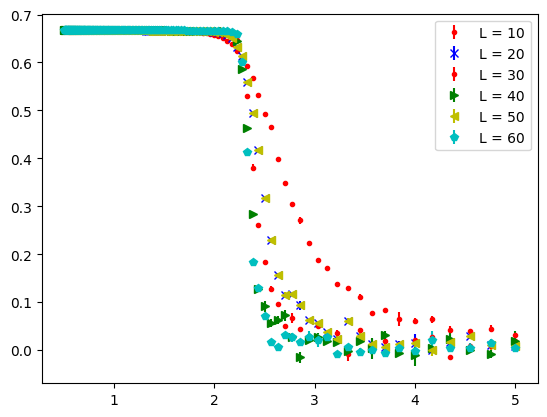

In [7]:
def binder_cum_plot(spin_simulation,color='r',format='.',boot_length=None,label=None):
    temp_dim = spin_simulation.shape[1]
    new_array = np.array([])
    for i in range(temp_dim):
        x_achse = 1/spin_simulation[0,i]
        new_data = spin_simulation[1:,i]
        y_data = binder_cummulanten(new_data)
        binder_error = np.array([])
        for _ in range(boot_length):
            binder_error = np.append(binder_error,binder_cummulanten(bootstrap_data(new_data)))

        new_array = np.append(new_array,y_data)
        y_err = np.std(binder_error)
        if(i<(temp_dim-1)):
            plt.errorbar(x_achse,y_data,yerr=y_err,c=color,fmt=format)
        
        else:
            plt.errorbar(x_achse,y_data,yerr=y_err,c=color,fmt=format,label=label)
        
    return new_array

length = 2
L_1 = binder_cum_plot(spin_simulation_1,boot_length=length,color='r',format='.',label="L = 10")
L_2 = binder_cum_plot(spin_simulation_2,boot_length=length,color='b',format='x',label="L = 20")
L_3 = binder_cum_plot(spin_simulation_3,boot_length=length,color='r',format='.',label="L = 30")
L_4 = binder_cum_plot(spin_simulation_4,boot_length=length,color='g',format='>',label="L = 40")
L_5 = binder_cum_plot(spin_simulation_2,boot_length=length,color='y',format='<',label="L = 50")
L_6 = binder_cum_plot(spin_simulation_6,boot_length=length,color='c',format='p',label="L = 60")

plt.legend()
plt.show()

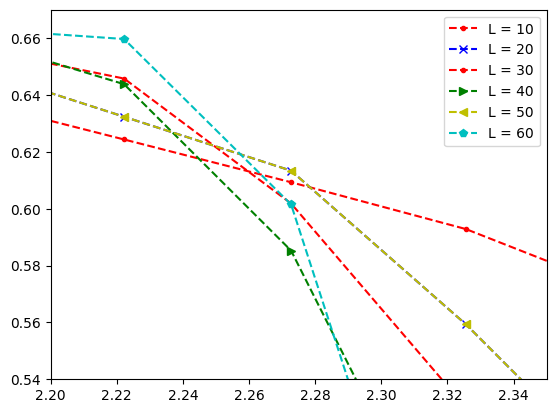

In [8]:
L = spin_simulation_1[0,:]
plt.plot(1/L,L_1,'.--',color='r',label="L = 10")
plt.plot(1/L,L_2,'x--',color='b',label="L = 20")
plt.plot(1/L,L_3,'.--',color='r',label="L = 30")
plt.plot(1/L,L_4,'>--',color='g',label="L = 40")
plt.plot(1/L,L_5,'<--',color='y',label="L = 50")
plt.plot(1/L,L_6,'p--',color='c',label="L = 60")
plt.xlim(2.2,2.35)
plt.ylim(0.54,0.67)
plt.legend()
plt.show()

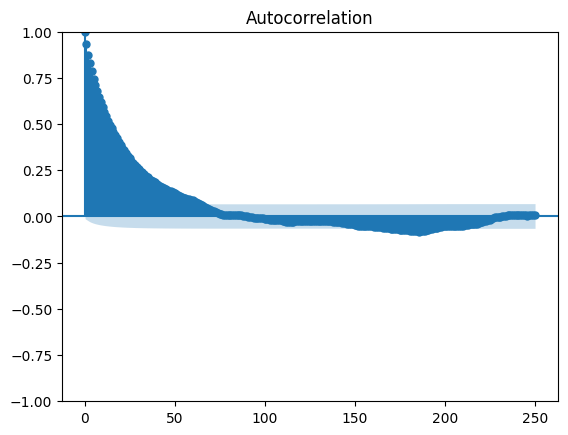

In [9]:
plot_acf(spin_simulation_3[1:,25],lags=250)
plt.show()

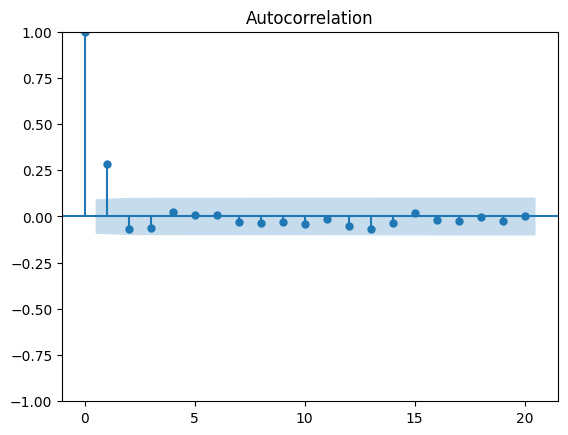

In [10]:
b = 27
new_data = data_blocking(spin_simulation_3[1:,b],block_length(spin_simulation_3[1:,b]))
plot_acf(new_data,lags=20)
plt.show()